# Facebook Stocks

### Loading Packages:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import csv

### Loading Datasets (Clean and Merge Data):

In [2]:
# Facebook stock prices 2012-2022
FB_dataframe = pd.read_csv ('./data/FB_stock_history.csv')
FB_dataframe = FB_dataframe.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1)
FB_dataframe = FB_dataframe.rename(columns={'Close': 'FB Close'})
FB_dataframe['Date'] = pd.to_datetime(FB_dataframe['Date'])

In [3]:
# Facebook MAU 2008-2022
# (https://www.statista.com/statistics/264810/number-of-monthly-active-facebook-users-worldwide/)
MAU_datafame = pd.read_csv ('./data/FB_MAU.csv')
MAU_datafame['Date'] = pd.to_datetime(MAU_datafame['Date'])
MAU_datafame.head()

# Add MAU to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, MAU_datafame, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB MAU (millions)'] = temp['MAU (millions)']

In [8]:
# Major social media stock prices 2012-2022
# (https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022)
sm_dataframe = pd.read_csv ('./data/social_media_stock.csv')
sm_dataframe['Date'] = pd.to_datetime(sm_dataframe['Date'])

# Add Major social media stock prices to Main FB_dataframe
copanies = ['TWTR', 'SNAP'] # Twitter, Snapchat
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    temp = pd.merge_asof(FB_dataframe, company_df, on='Date', tolerance=pd.Timedelta('7 days'))
    FB_dataframe[company+' Close'] = temp['Close']

In [14]:
# Apple and Google Stock Price 
# (https://www.kaggle.com/datasets/vainero/google-apple-facebook-stock-price)
apple_dataframe = pd.read_csv ('./data/Apple_stock.csv')
apple_dataframe['Date'] = pd.to_datetime(apple_dataframe['Date'])
google_dataframe = pd.read_csv ('./data/Google_stock.csv')
google_dataframe['Date'] = pd.to_datetime(google_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, apple_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Apple Close'] = temp['Close']
temp = pd.merge_asof(FB_dataframe, google_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('7 days'))
FB_dataframe['Google Close'] = temp['Close']

In [15]:
# Facebook Net Income and Lobbying Expense
# (https://www.statista.com/statistics/223289/facebooks-quarterly-net-income/?locale=en)
# (https://www.statista.com/statistics/236969/quarterly-lobbying-expenses-of-facebook/?locale=en)
income_dataframe = pd.read_csv ('./data/FB_income.csv')
income_dataframe['Date'] = pd.to_datetime(income_dataframe['Date'])
lobbying_dataframe = pd.read_csv ('./data/FB_lobbying.csv')
lobbying_dataframe['Date'] = pd.to_datetime(lobbying_dataframe['Date'])

# Add Apple and Google Stocks to Main FB_dataframe
temp = pd.merge_asof(FB_dataframe, income_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Net Income (millions)'] = temp['net income (millions)']
temp = pd.merge_asof(FB_dataframe, lobbying_dataframe, on='Date', direction='nearest', tolerance=pd.Timedelta('46 days'))
FB_dataframe['FB Lobbying (millions)'] = temp['lobbying expense (millions)']
FB_dataframe

,Date,FB Close,FB MAU (millions),TWTR Close,SNAP Close,Apple Close,Google Close,FB Net Income (millions),FB Lobbying (millions)
0,2012-05-18,38.230000,955,NaN,NaN,NaN,NaN,-157,0.96
1,2012-05-21,34.029999,955,NaN,NaN,NaN,NaN,-157,0.96
2,2012-05-22,31.000000,955,NaN,NaN,NaN,NaN,-157,0.96
3,2012-05-23,32.000000,955,NaN,NaN,NaN,NaN,-157,0.96
4,2012-05-24,33.029999,955,NaN,NaN,NaN,NaN,-157,0.96
...,...,...,...,...,...,...,...,...,...
2354,2021-09-27,353.579987,2910,65.370003,80.080002,145.369995,141.501007,9194,5.09
2355,2021-09-28,340.649994,2910,62.450001,74.419998,141.910004,136.184006,9194,5.09
2356,2021-09-29,339.609985,2910,60.070000,71.760002,142.830002,134.520996,9194,5.09
2357,2021-09-30,339.390015,2910,60.389999,73.870003,141.500000,133.265503,9194,5.09


### Basic Plots

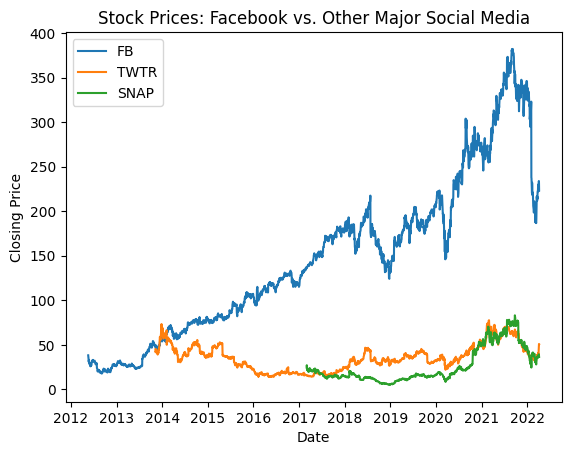

In [16]:
# Closing prices of Facebook vs Other Major Social Media (2012-2022)
copanies = ['FB', 'TWTR', 'SNAP']
for company in copanies:
    company_df = sm_dataframe[sm_dataframe['Symbol']==company]
    plt.plot(company_df['Date'], company_df['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Prices: Facebook vs. Other Major Social Media')
plt.legend()
plt.show()

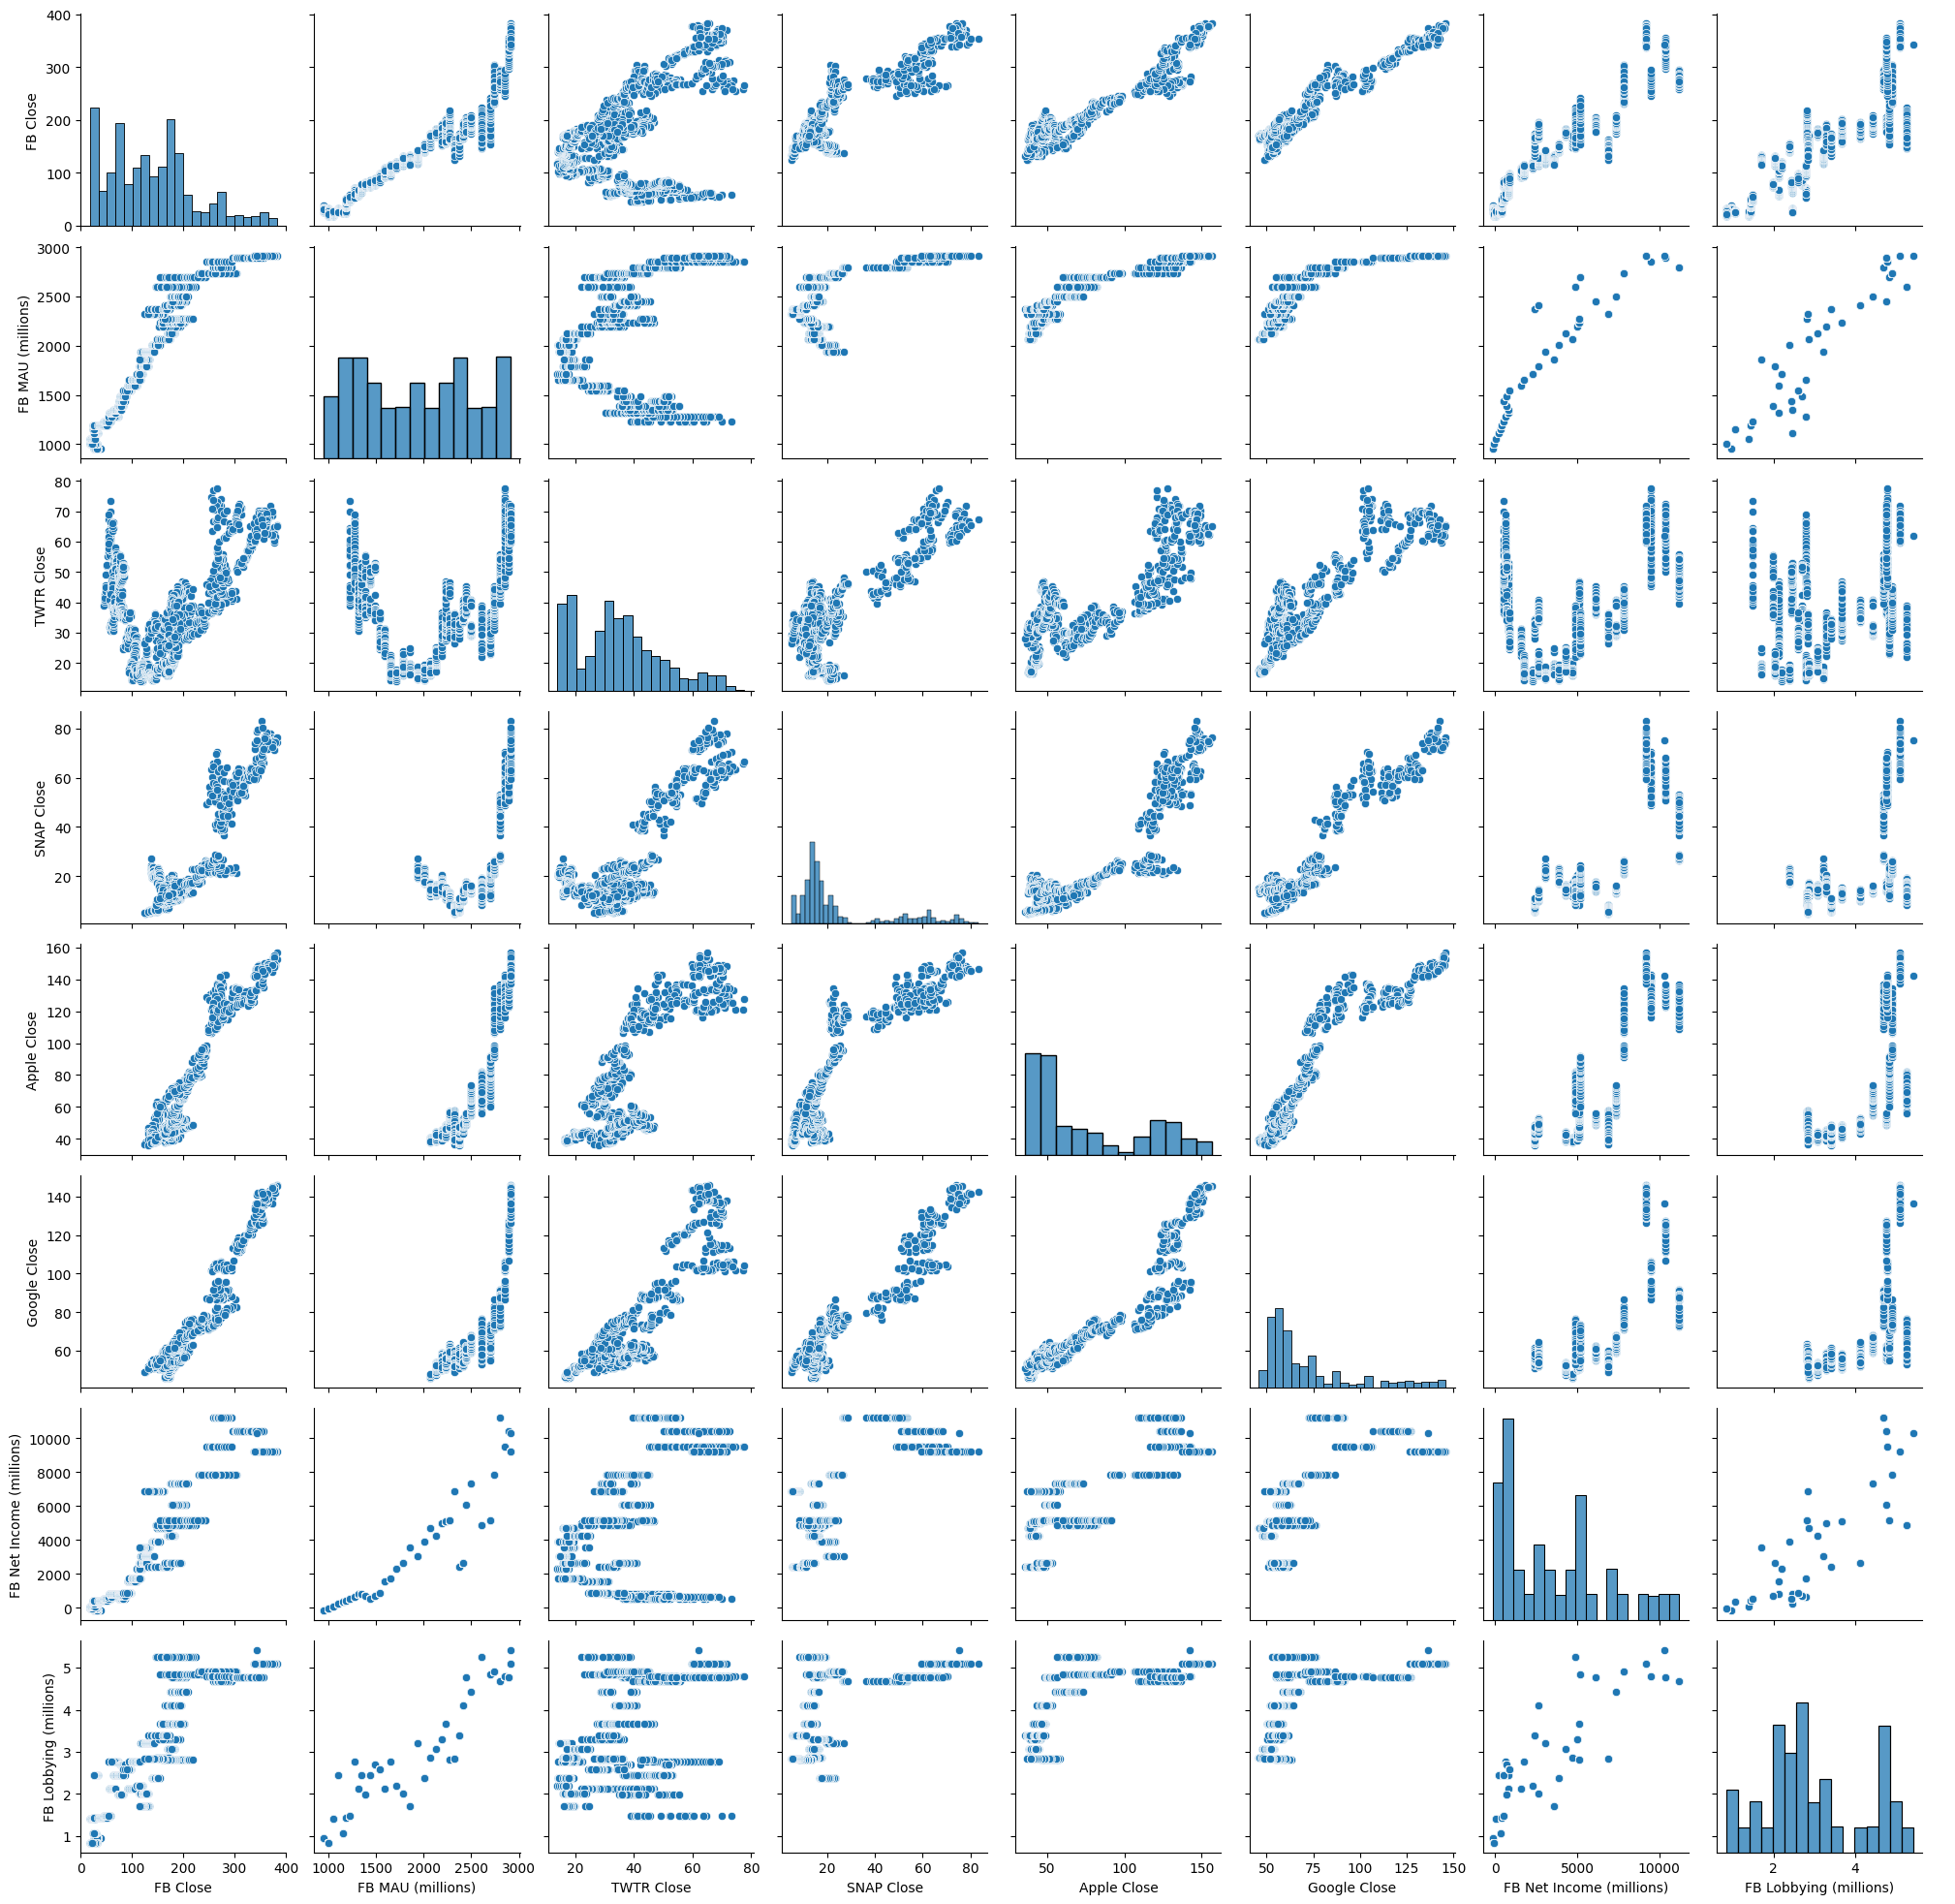

In [17]:
i = sns.PairGrid(FB_dataframe)
i.map_diag(sns.histplot)
i.map_offdiag(sns.scatterplot)
i.add_legend()

### Train Model and Predict

### Evaluate Accuracy